In [27]:
#Impoting library for data manipulation and analysis
import pandas as pd

#supports  large, multi-dimensional arrays and matrices
import numpy as np

#library  that provides an object-oriented API for embedding plots into applications
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
train_dataset = pd.read_csv("/content/gdrive/MyDrive/Master_Thesis/train_data.csv",sep=',', header=0)
train_dataset.columns=["Sale_Date","Product_Id","Department_Id","Product_Category","Outlet_Id","City_Name","Sales"]
train_dataset.head(5)


,Sale_Date,Product_Id,Department_Id,Product_Category,Outlet_Id,City_Name,Sales
0,2012-01-01,74,11,Others_Goods,111,Mumbai,0
1,2012-01-01,337,11,Others_Goods,111,Mumbai,1
2,2012-01-01,423,12,Others_Goods,111,Mumbai,0
3,2012-01-01,432,12,Others_Goods,111,Mumbai,0
4,2012-01-01,581,21,Consumer_Packaged_Goods,111,Mumbai,0


In [30]:
price_dataset = pd.read_csv("/content/gdrive/MyDrive/Master_Thesis/price_date.csv",sep=',', header=0)
price_dataset.columns=['Id','Outlet_Id','Product_Id','Week_Id','Sell_price','Sale_Date']
price_dataset.head(5)



,Id,Outlet_Id,Product_Id,Week_Id,Sell_price,Sale_Date
0,0,111,74,49,2.94,2012-01-01
1,1,111,74,49,2.94,2012-01-02
2,2,111,74,49,2.94,2012-01-03
3,3,111,74,49,2.94,2012-01-04
4,4,111,74,49,2.94,2012-01-05


In [31]:
final_dataset=pd.merge(train_dataset,price_dataset, on=['Sale_Date','Product_Id','Outlet_Id'], how='inner')
final_dataset=final_dataset.drop(['Id'], axis=1)
final_dataset

,Sale_Date,Product_Id,Department_Id,Product_Category,Outlet_Id,City_Name,Sales,Week_Id,Sell_price
0,2012-01-01,74,11,Others_Goods,111,Mumbai,0,49,2.94
1,2012-01-01,337,11,Others_Goods,111,Mumbai,1,49,7.44
2,2012-01-01,423,12,Others_Goods,111,Mumbai,0,49,0.97
3,2012-01-01,432,12,Others_Goods,111,Mumbai,0,49,4.97
4,2012-01-01,581,21,Consumer_Packaged_Goods,111,Mumbai,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,Food_Beverage_Items,333,Hyderabad,2,161,2.78
394996,2014-02-28,2935,33,Food_Beverage_Items,333,Hyderabad,8,161,0.20
394997,2014-02-28,3004,33,Food_Beverage_Items,333,Hyderabad,0,161,2.50
394998,2014-02-28,3008,33,Food_Beverage_Items,333,Hyderabad,0,161,1.98


In [32]:
final_dataset.head(5)

,Sale_Date,Product_Id,Department_Id,Product_Category,Outlet_Id,City_Name,Sales,Week_Id,Sell_price
0,2012-01-01,74,11,Others_Goods,111,Mumbai,0,49,2.94
1,2012-01-01,337,11,Others_Goods,111,Mumbai,1,49,7.44
2,2012-01-01,423,12,Others_Goods,111,Mumbai,0,49,0.97
3,2012-01-01,432,12,Others_Goods,111,Mumbai,0,49,4.97
4,2012-01-01,581,21,Consumer_Packaged_Goods,111,Mumbai,0,49,4.88


In [33]:
final_dataset.shape

(395000, 9)

In [34]:
final_dataset.describe()

,Product_Id,Department_Id,Outlet_Id,Sales,Week_Id,Sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [35]:
final_dataset.isnull().sum()

Sale_Date           0
Product_Id          0
Department_Id       0
Product_Category    0
Outlet_Id           0
City_Name           0
Sales               0
Week_Id             0
Sell_price          0
dtype: int64

In [36]:
#	Explore the data types of each column.
final_dataset.dtypes

Sale_Date            object
Product_Id            int64
Department_Id         int64
Product_Category     object
Outlet_Id             int64
City_Name            object
Sales                 int64
Week_Id               int64
Sell_price          float64
dtype: object

In [37]:
#converting as category
column = ['Product_Category', 'City_Name']
final_dataset[column] = final_dataset[column].astype('category')

column2 = ['Product_Id', 'Department_Id','Outlet_Id','Sales','Week_Id']
final_dataset[column2] = final_dataset[column2].astype('float64')

#	Understand if all the columns are in appropriate datatypes or not.
final_dataset.dtypes

Sale_Date             object
Product_Id           float64
Department_Id        float64
Product_Category    category
Outlet_Id            float64
City_Name           category
Sales                float64
Week_Id              float64
Sell_price           float64
dtype: object

In [38]:
final_dataset.nunique(axis=0)

Sale_Date           790
Product_Id           50
Department_Id         6
Product_Category      3
Outlet_Id            10
City_Name             3
Sales               126
Week_Id             113
Sell_price          107
dtype: int64

<Figure size 7200x2880 with 0 Axes>

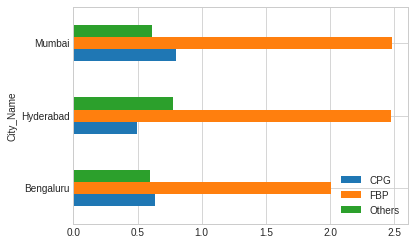

In [39]:
plt.figure(figsize=(100,40));
final_dataset.groupby(['City_Name','Product_Category'])['Sales'].mean().unstack(1).plot.barh(width = 0.5)
plt.legend(["CPG", "FBP","Others"]);
#plt.legend(["Consumer_Packaged_Goods","Food_Beverage_Items" "Others_Goods"]);


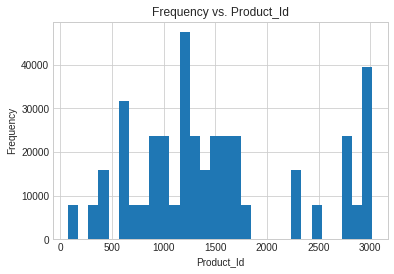

In [ ]:
#Analysing data distribution of each column

final_dataset["Product_Id"].plot(bins=30, kind="hist", subplots=True);
plt.ylabel('Frequency');
plt.xlabel('Product_Id');
plt.title("Frequency vs. Product_Id");



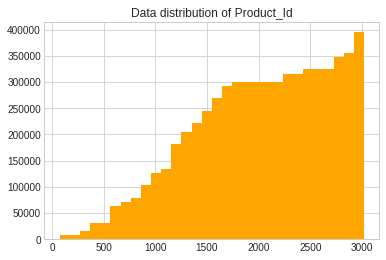

In [ ]:
#Analysing data distribution of each column
final_dataset["Product_Id"].hist(bins=30, cumulative=True,color ='orange');
plt.title("Data distribution of Product_Id");

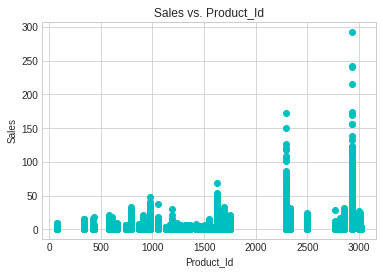

In [ ]:
plt.figure();
plt.scatter(final_dataset['Product_Id'] , final_dataset['Sales'], color = 'c');
plt.ylabel('Sales');
plt.xlabel('Product_Id');
plt.title("Sales vs. Product_Id");

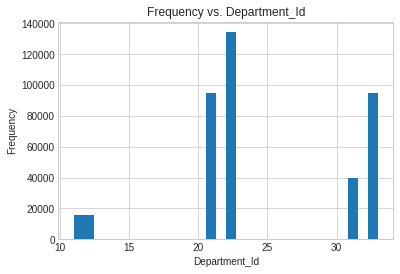

In [ ]:
#Analysing data distribution of each column

final_dataset["Department_Id"].plot(bins=30, kind="hist", subplots=True);
plt.ylabel('Frequency');
plt.xlabel('Department_Id');
plt.title("Frequency vs. Department_Id");

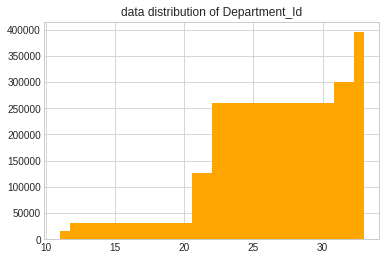

In [ ]:
#Analysing data distribution of each column
final_dataset["Department_Id"].hist(bins=30, cumulative=True,color ='orange');
plt.title("data distribution of Department_Id");

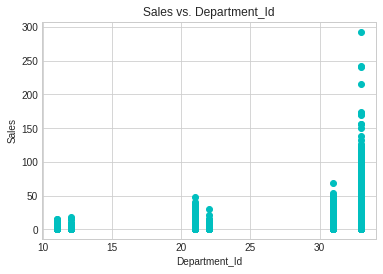

In [ ]:
    plt.figure();
    plt.scatter(final_dataset['Department_Id'] , final_dataset['Sales'], color = 'c');
    plt.ylabel('Sales');
    plt.xlabel('Department_Id');
    plt.title("Sales vs. Department_Id");

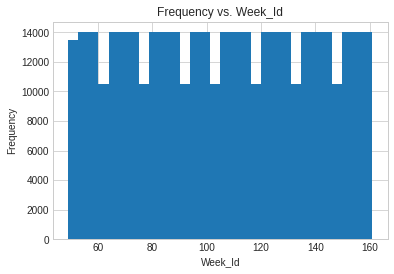

In [ ]:
#Analysing data distribution of each column

final_dataset["Week_Id"].plot(bins=30, kind="hist", subplots=True)
plt.ylabel('Frequency');
plt.xlabel('Week_Id');
plt.title("Frequency vs. Week_Id");


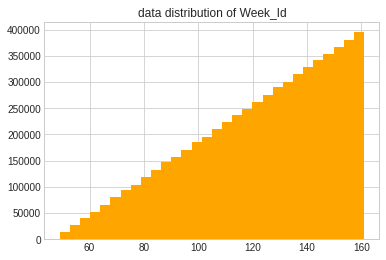

In [ ]:
#Analysing data distribution of each column
final_dataset["Week_Id"].hist(bins=30, cumulative=True,color ='orange');
plt.title("data distribution of Week_Id");

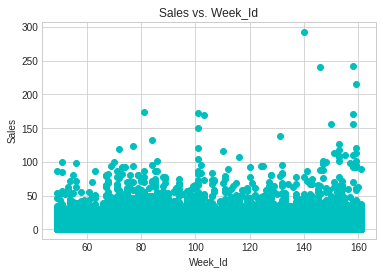

In [ ]:
    plt.figure();
    plt.scatter(final_dataset['Week_Id'] , final_dataset['Sales'], color = 'c');
    plt.ylabel('Sales');
    plt.xlabel('Week_Id');
    plt.title("Sales vs. Week_Id");


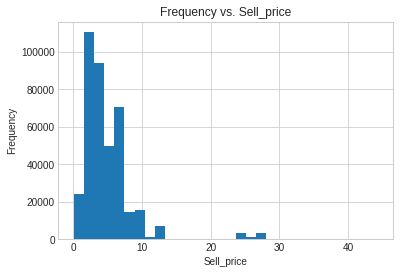

In [ ]:
 
#Analysing data distribution of each column

final_dataset["Sell_price"].plot(bins=30, kind="hist", subplots=True)
plt.ylabel('Frequency');
plt.xlabel('Sell_price');
plt.title("Frequency vs. Sell_price");



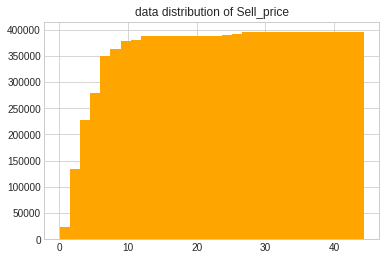

In [ ]:
#Analysing data distribution of each column
final_dataset["Sell_price"].hist(bins=30, cumulative=True,color ='orange');
plt.title("data distribution of Sell_price");

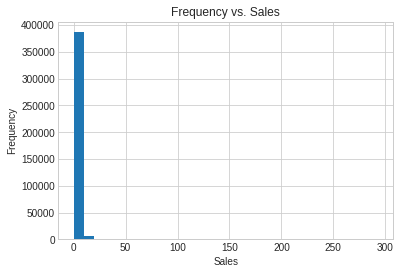

In [ ]:
#Analysing data distribution of each column

final_dataset["Sales"].plot(bins=30, kind="hist", subplots=True)
plt.ylabel('Frequency');
plt.xlabel('Sales');
plt.title("Frequency vs. Sales");


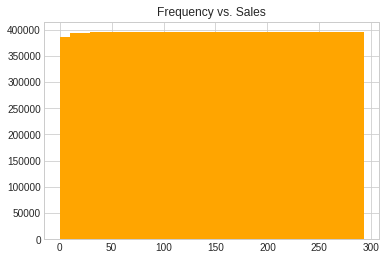

In [ ]:
#Analysing data distribution of each column
final_dataset["Sales"].hist(bins=30, cumulative=True,color ='orange');
plt.title("Frequency vs. Sales");

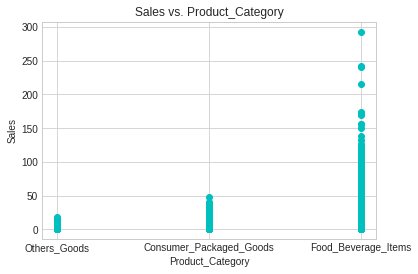

In [ ]:
plt.figure();
plt.scatter(final_dataset['Product_Category'] , final_dataset['Sales'], color = 'c');
plt.ylabel('Sales');
plt.xlabel('Product_Category');
plt.title("Sales vs. Product_Category");

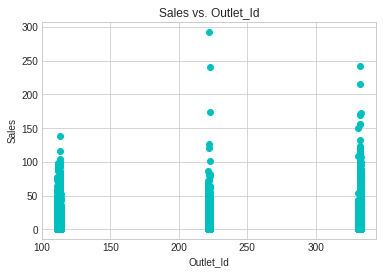

In [ ]:
plt.figure();
plt.scatter(final_dataset['Outlet_Id'] , final_dataset['Sales'], color = 'c');
plt.ylabel('Sales');
plt.xlabel('Outlet_Id');
plt.title("Sales vs. Outlet_Id");

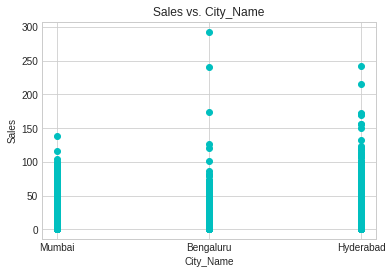

In [ ]:
plt.figure();
plt.scatter(final_dataset['City_Name'] , final_dataset['Sales'], color = 'c');
plt.ylabel('Sales');
plt.xlabel('City_Name');
plt.title("Sales vs. City_Name");

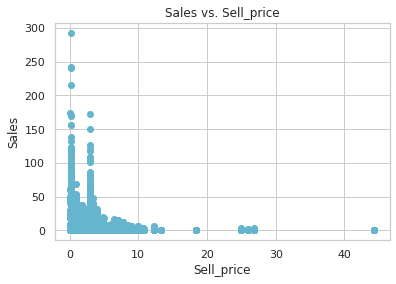

In [ ]:
plt.figure();
plt.scatter(final_dataset['Sell_price'] , final_dataset['Sales'], color = 'c');
plt.ylabel('Sales');
plt.xlabel('Sell_price');
plt.title("Sales vs. Sell_price");

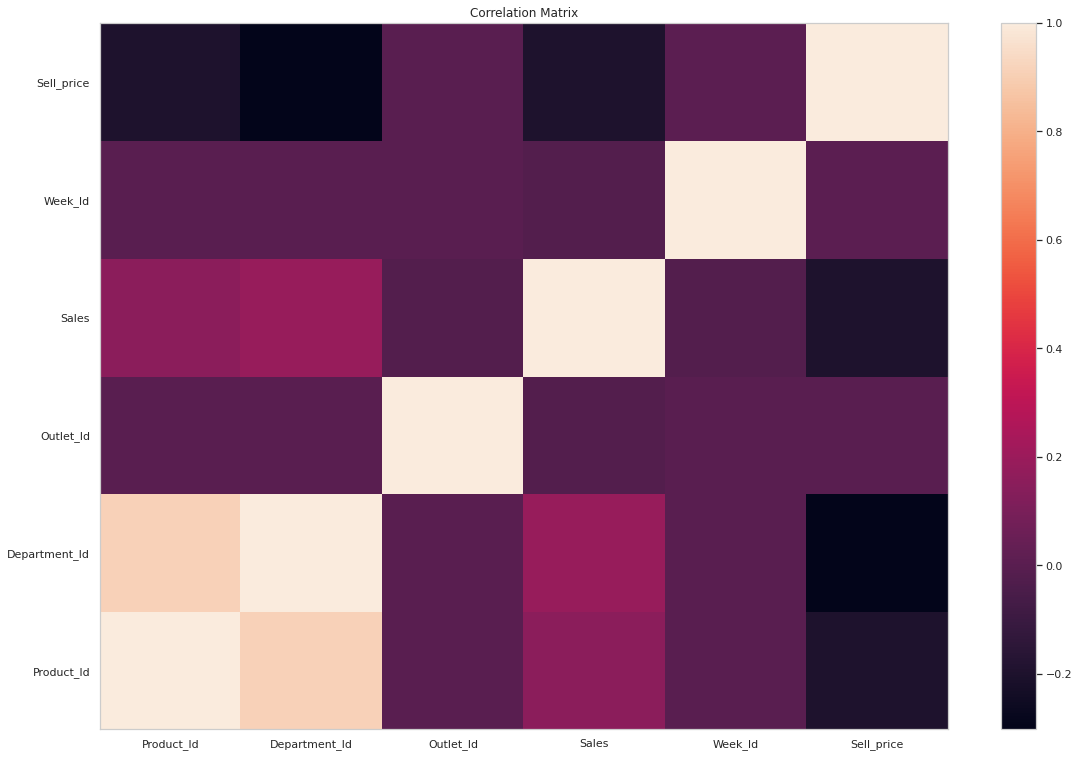

In [ ]:
# Python data visualization library based on matplotlib
import seaborn as sns
sns.set(style="whitegrid") #YlGnBu


figures = plt.figure(figsize=(19, 13))
corr = final_dataset.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
figures.colorbar(c)
plt.title("Correlation Matrix");

In [16]:
# calculate correlation matrix
corr = final_dataset.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

NameError: ignored

In [40]:
##use label encoder-LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
final_dataset['City_Name_encode'] = LabelEncoder().fit_transform(final_dataset['City_Name'])
final_dataset[['City_Name', 'City_Name_encode']]

,City_Name,City_Name_encode
0,Mumbai,2
1,Mumbai,2
2,Mumbai,2
3,Mumbai,2
4,Mumbai,2
...,...,...
394995,Hyderabad,1
394996,Hyderabad,1
394997,Hyderabad,1
394998,Hyderabad,1


In [41]:
final_dataset['Product_Category_encode'] = LabelEncoder().fit_transform(final_dataset['Product_Category'])
final_dataset[['Product_Category', 'Product_Category_encode']]

,Product_Category,Product_Category_encode
0,Others_Goods,2
1,Others_Goods,2
2,Others_Goods,2
3,Others_Goods,2
4,Consumer_Packaged_Goods,0
...,...,...
394995,Food_Beverage_Items,1
394996,Food_Beverage_Items,1
394997,Food_Beverage_Items,1
394998,Food_Beverage_Items,1


In [42]:
final_dataset['Month'] = pd.to_datetime(final_dataset['Sale_Date']).dt.month
final_dataset = final_dataset.drop(columns=["Sale_Date","Week_Id","City_Name","Product_Category"])
final_dataset

,Product_Id,Department_Id,Outlet_Id,Sales,Sell_price,City_Name_encode,Product_Category_encode,Month
0,74.0,11.0,111.0,0.0,2.94,2,2,1
1,337.0,11.0,111.0,1.0,7.44,2,2,1
2,423.0,12.0,111.0,0.0,0.97,2,2,1
3,432.0,12.0,111.0,0.0,4.97,2,2,1
4,581.0,21.0,111.0,0.0,4.88,2,0,1
...,...,...,...,...,...,...,...,...
394995,2932.0,33.0,333.0,2.0,2.78,1,1,2
394996,2935.0,33.0,333.0,8.0,0.20,1,1,2
394997,3004.0,33.0,333.0,0.0,2.50,1,1,2
394998,3008.0,33.0,333.0,0.0,1.98,1,1,2


In [43]:
final_dataset.dtypes

Product_Id                 float64
Department_Id              float64
Outlet_Id                  float64
Sales                      float64
Sell_price                 float64
City_Name_encode             int64
Product_Category_encode      int64
Month                        int64
dtype: object

In [44]:
column3 = ['City_Name_encode', 'Product_Category_encode','Month']
final_dataset[column3] = final_dataset[column3].astype('float64')

In [45]:
final_dataset.dtypes

Product_Id                 float64
Department_Id              float64
Outlet_Id                  float64
Sales                      float64
Sell_price                 float64
City_Name_encode           float64
Product_Category_encode    float64
Month                      float64
dtype: object

In [46]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X = final_dataset.drop(final_dataset.columns[[3]], axis=1)
y = final_dataset["Sales"]

#X = X.head(100)
#y = y.head(100)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,random_state=45)
   


In [48]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train),columns=X_train.columns)
x_test_scaled = pd.DataFrame(standard_scaler.transform(X_test),columns = X_test.columns)

x_train_scaled

,Product_Id,Department_Id,Outlet_Id,Sell_price,City_Name_encode,Product_Category_encode,Month
0,-0.350014,-0.390520,-1.076637,1.872020,1.082795,-0.781942,-0.038106
1,-0.417923,-0.390520,-1.098572,1.023645,1.082795,-0.781942,-0.038106
2,0.225369,1.029746,1.314260,-0.775937,-0.121202,0.781309,-0.597932
3,-0.396933,-0.390520,-1.076637,-0.441729,1.082795,-0.781942,-0.318019
4,1.013125,1.345361,0.129779,-0.593408,-1.325200,0.781309,-0.877845
...,...,...,...,...,...,...,...
236995,-1.332856,-1.968594,1.314260,-0.004688,-0.121202,2.344559,0.801633
236996,-1.148882,-0.548327,-1.076637,-0.027825,1.082795,-0.781942,-1.157757
236997,-0.564856,-0.548327,0.129779,-0.518854,-1.325200,-0.781942,-0.597932
236998,-1.332856,-1.968594,1.314260,-0.004688,-0.121202,2.344559,-0.038106


In [49]:
X_train = x_train_scaled
X_test = x_test_scaled

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_test=lr.predict(X_test)

MAE_val_lr_test = metrics.mean_absolute_error (y_test,y_pred_lr_test)
print("The MAE value of Linear regression for test dataset:",MAE_val_lr_test )

MSE_val_lr_test = metrics.mean_squared_error (y_test,y_pred_lr_test)
print("The MSE value of Linear regression for test dataset:",MSE_val_lr_test )

RMSE_val_lr_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr_test))
print("The RMSE value of Linear regression for test dataset:",RMSE_val_lr_test)

Rsquare_val_lr_test = metrics.r2_score (y_test,y_pred_lr_test)
print("The R-square value of Linear regression for test dataset:",Rsquare_val_lr_test)

The MAE value of Linear regression for test dataset: 1.5382511657154325
The MSE value of Linear regression for test dataset: 12.3594965151606
The RMSE value of Linear regression for test dataset: 3.515607559890694
The R-square value of Linear regression for test dataset: 0.061446706889554115


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred_knn_test=knn.predict(X_test)


MAE_val_knn_test = metrics.mean_absolute_error (y_test,y_pred_knn_test)
print("The MAE value of KNN regression for test dataset:",MAE_val_knn_test )

MSE_val_knn_test = metrics.mean_squared_error (y_test,y_pred_knn_test)
print("The MSE value of KNN regression for test dataset:",MSE_val_knn_test )

RMSE_val_knn_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn_test))
print("The RMSE value of KNN regression for test dataset:",RMSE_val_knn_test)

Rsquare_val_knn_test = metrics.r2_score (y_test,y_pred_knn_test)
print("The R-square value of KNN regression for test dataset:",Rsquare_val_knn_test)

The MAE value of KNN regression for test dataset: 1.0643189873417722
The MSE value of KNN regression for test dataset: 8.173158015189873
The RMSE value of KNN regression for test dataset: 2.8588735570482777
The R-square value of KNN regression for test dataset: 0.3793481505610655


In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.63680117477023
RMSE value for k=  2 is: 3.224123372172247
RMSE value for k=  3 is: 3.293288469774198
RMSE value for k=  4 is: 3.14897668982131
RMSE value for k=  5 is: 3.066998739129637
RMSE value for k=  6 is: 3.005971260810015
RMSE value for k=  7 is: 2.9816390896735796
RMSE value for k=  8 is: 2.9619855479181445
RMSE value for k=  9 is: 2.940486605709333
RMSE value for k=  10 is: 2.9282578632907406
RMSE value for k=  11 is: 2.919499306463246
RMSE value for k=  12 is: 2.910328790554082
RMSE value for k=  13 is: 2.8969375118897838
RMSE value for k=  14 is: 2.8922473739509322
RMSE value for k=  15 is: 2.8917120669109546
RMSE value for k=  16 is: 2.8862723858301553
RMSE value for k=  17 is: 2.8721271150405516
RMSE value for k=  18 is: 2.8690429870173326
RMSE value for k=  19 is: 2.8664153822603264
RMSE value for k=  20 is: 2.8649718087949614
RMSE value for k=  21 is: 2.8576421579997513
RMSE value for k=  22 is: 2.859127338539706
RMSE value for k=  23 is: 2.858

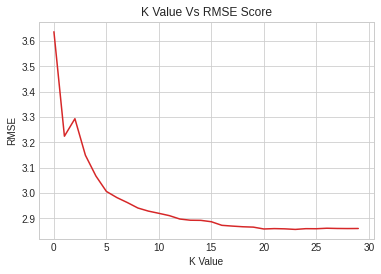

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot(color ='tab:red',legend=None)
plt.title('K Value Vs RMSE Score')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred_dtr_test=dtr.predict(X_test)

MAE_val_dtr_test = metrics.mean_absolute_error (y_test,y_pred_dtr_test)
print("The MAE value of Decision regression for test dataset:",MAE_val_dtr_test )

MSE_val_dtr_test = metrics.mean_squared_error (y_test,y_pred_dtr_test)
print("The MSE value of Decision tree for test dataset:",MSE_val_dtr_test )

RMSE_val_dtr_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr_test))
print("The RMSE value of Decision tree for test dataset:",RMSE_val_dtr_test)

Rsquare_val_dtr_test = metrics.r2_score (y_test,y_pred_dtr_test)
print("The R-square value of Decision tree for test dataset:",Rsquare_val_dtr_test)

The MAE value of Decision regression for test dataset: 1.0454794092372501
The MSE value of Decision tree for test dataset: 8.011369780713391
The RMSE value of Decision tree for test dataset: 2.8304363233807948
The R-square value of Decision tree for test dataset: 0.39163399732417326


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

adbr = AdaBoostRegressor(random_state=0, n_estimators=100)
adbr.fit(X_train, y_train)
y_pred_adbr_test=adbr.predict(X_test)

MAE_val_adbr_test = metrics.mean_absolute_error (y_test,y_pred_adbr_test)
print("The MAE value of adaboost for test dataset:",MAE_val_adbr_test )

MSE_val_adbr_test = metrics.mean_squared_error (y_test,y_pred_adbr_test)
print("The MSE value of adaboost for test dataset:",MSE_val_adbr_test )

RMSE_val_adbr_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_adbr_test))
print("The RMSE value of adaboost for test dataset:",RMSE_val_adbr_test)

Rsquare_val_adbr_test = metrics.r2_score (y_test,y_pred_adbr_test)
print("The R-square value of adaboost for test dataset:",Rsquare_val_adbr_test)

The MAE value of adaboost for test dataset: 1.5605921107822565
The MSE value of adaboost for test dataset: 23.894782229928047
The RMSE value of adaboost for test dataset: 4.888228946144815
The R-square value of adaboost for test dataset: -0.8145178100537309


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

adbr = GradientBoostingRegressor(random_state=0)
adbr.fit(X_train, y_train)
y_pred_adbr_test=adbr.predict(X_test)

MAE_val_adbr_test = metrics.mean_absolute_error (y_test,y_pred_adbr_test)
print("The MAE value of GBR for test dataset:",MAE_val_adbr_test )

MSE_val_adbr_test = metrics.mean_squared_error (y_test,y_pred_adbr_test)
print("The MSE value of GBR for test dataset:",MSE_val_adbr_test )

RMSE_val_adbr_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_adbr_test))
print("The RMSE value of GBR for test dataset:",RMSE_val_adbr_test)

Rsquare_val_adbr_test = metrics.r2_score (y_test,y_pred_adbr_test)
print("The R-square value of GBR for test dataset:",Rsquare_val_adbr_test)

The MAE value of GBR for test dataset: 1.206472119033617
The MSE value of GBR for test dataset: 9.034171944195087
The RMSE value of GBR for test dataset: 3.0056899281521186
The R-square value of GBR for test dataset: 0.3139646248251625


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

las = Lasso(alpha=1.0)
las.fit(X_train, y_train)
y_pred_las_test=las.predict(X_test)

MAE_val_las_test = metrics.mean_absolute_error (y_test,y_pred_las_test)
print("The MAE value of Lasso regression for test dataset:",MAE_val_las_test )

MSE_val_las_test = metrics.mean_squared_error (y_test,y_pred_las_test)
print("The MSE value of Lasso regression for test dataset:",MSE_val_las_test )

RMSE_val_las_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_las_test))
print("The RMSE value of Lasso regression for test dataset:",RMSE_val_las_test)

Rsquare_val_las_test = metrics.r2_score (y_test,y_pred_las_test)
print("The R-square value of Lasso regression for test dataset:",Rsquare_val_las_test)

The MAE value of Lasso regression for test dataset: 1.6069562073385675
The MSE value of Lasso regression for test dataset: 13.168677879346257
The RMSE value of Lasso regression for test dataset: 3.6288672997708606
The R-square value of Lasso regression for test dataset: -7.665692933755963e-07


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

rfr = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
rfr.fit(X_train, y_train)
y_pred_rfr_test=rfr.predict(X_test)

MAE_val_rfr_test = metrics.mean_absolute_error (y_test,y_pred_rfr_test)
print("The MAE value of Random Forest regression for test dataset:",MAE_val_rfr_test )

MSE_val_rfr_test = metrics.mean_squared_error (y_test,y_pred_rfr_test)
print("The MSE value of Random Forest regression for test dataset:",MSE_val_rfr_test )

RMSE_val_rfr_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfr_test))
print("The RMSE value of Random Forest regression for test dataset:",RMSE_val_rfr_test)

Rsquare_val_rfr_test = metrics.r2_score (y_test,y_pred_rfr_test)
print("The R-square value of Random Forest regression for test dataset:",Rsquare_val_rfr_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The MAE value of Random Forest regression for test dataset: 1.0454010017422173
The MSE value of Random Forest regression for test dataset: 8.000842425640082
The RMSE value of Random Forest regression for test dataset: 2.828576042046613
The R-square value of Random Forest regression for test dataset: 0.3924334217796661


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

etr = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
etr.fit(X_train, y_train)
y_pred_etr_test=etr.predict(X_test)


MAE_val_etr_test = metrics.mean_absolute_error (y_test,y_pred_etr_test)
print("The MAE value of Extra tree regression for test dataset:",MAE_val_etr_test )

MSE_val_etr_test = metrics.mean_squared_error (y_test,y_pred_etr_test)
print("The MSE value of Extra tree regression for test dataset:",MSE_val_etr_test )

RMSE_val_etr_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_etr_test))
print("The RMSE value of Extra tree  regression for test dataset:",RMSE_val_etr_test)

Rsquare_val_etr_test = metrics.r2_score (y_test,y_pred_etr_test)
print("The R-square value of Extra tree regression for test dataset:",Rsquare_val_etr_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The MAE value of Extra tree regression for test dataset: 1.0454633884876134
The MSE value of Extra tree regression for test dataset: 8.010959441127396
The RMSE value of Extra tree  regression for test dataset: 2.8303638354684004
The R-square value of Extra tree regression for test dataset: 0.39166515762016574


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
import timeit

base_models = [
    ('Linear Regression',LinearRegression()),
    ('Decision Tree',DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor(n_neighbors=10)),
    ('Lasso',Lasso(alpha=1.0)),
    ('Random Forest',RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)),
    ('Extra tree', ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1))
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)


In [ ]:
stacked.fit(X_train, y_train)    
stacked_prediction = stacked.predict(X_test)

stacked_r2 = stacked.score(X_test, y_test)
stacked_mse = metrics.mean_squared_error (y_test,stacked_prediction)
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)
stacked_mae = metrics.mean_absolute_error (y_test,stacked_prediction)


print("\n\n\n\n")
print("-------Stacked Ensemble-------\n")
print("Value of the R-squared: {}".format(stacked_r2))
print("Value of the Mean Squared Error: {}".format(stacked_mse))
print("Value of the Root Mean Squared Error: {}".format(stacked_rmse))
print(" Value of the Mean absolute Error: {}".format(stacked_mae))
print("-------------------------------------------------")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j






-------Stacked Ensemble-------

Value of the R-squared: 0.39147718650587693
Value of the Mean Squared Error: 8.013434770284576
Value of the Root Mean Squared Error: 2.8308010827828536
 Value of the Mean absolute Error: 1.059303585898537
-------------------------------------------------


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


In [50]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [84]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = x_train_scaled.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               2048      
                                                                 
 dense_43 (Dense)            (None, 512)               131584    
                                                                 
 dense_44 (Dense)            (None, 512)               262656    
                                                                 
 dense_45 (Dense)            (None, 512)               262656    
                                                                 
 dense_46 (Dense)            (None, 1)                 513       
                                                                 
Total params: 659,457
Trainable params: 659,457
Non-trainable params: 0
_________________________________________________________________


In [85]:



NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

history = NN_model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=20, 
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
1482/1482 [==============================] - 25s 17ms/step - loss: 10.1592 - mean_squared_error: 10.1592 - val_loss: 9.2576 - val_mean_squared_error: 9.2576
Epoch 2/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.5858 - mean_squared_error: 9.5858 - val_loss: 9.1237 - val_mean_squared_error: 9.1237
Epoch 3/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.4237 - mean_squared_error: 9.4237 - val_loss: 9.1092 - val_mean_squared_error: 9.1092
Epoch 4/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.4137 - mean_squared_error: 9.4137 - val_loss: 9.0178 - val_mean_squared_error: 9.0178
Epoch 5/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.3742 - mean_squared_error: 9.3742 - val_loss: 8.9492 - val_mean_squared_error: 8.9492
Epoch 6/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.3430 - mean_squared_error: 9.3430 - val_loss: 9.0531 - val_mean_squared_error: 9.0531
Ep

Train: 8.840, Test: 9.295


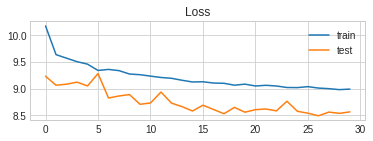

In [77]:
# evaluate the model
from matplotlib import pyplot
_, train_mse = NN_model.evaluate(x_train_scaled, y_train, verbose=0)
_, test_mse = NN_model.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

In [80]:

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

history = NN_model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=20, 
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
1482/1482 [==============================] - 25s 17ms/step - loss: 1.1331 - mean_absolute_error: 1.1331 - val_loss: 1.1100 - val_mean_absolute_error: 1.1100
Epoch 2/20
1482/1482 [==============================] - 23s 16ms/step - loss: 1.0996 - mean_absolute_error: 1.0996 - val_loss: 1.1188 - val_mean_absolute_error: 1.1188
Epoch 3/20
1482/1482 [==============================] - 23s 16ms/step - loss: 1.0885 - mean_absolute_error: 1.0885 - val_loss: 1.1013 - val_mean_absolute_error: 1.1013
Epoch 4/20
1482/1482 [==============================] - 23s 16ms/step - loss: 1.0841 - mean_absolute_error: 1.0841 - val_loss: 1.0980 - val_mean_absolute_error: 1.0980
Epoch 5/20
1482/1482 [==============================] - 23s 16ms/step - loss: 1.0792 - mean_absolute_error: 1.0792 - val_loss: 1.0832 - val_mean_absolute_error: 1.0832
Epoch 6/20
1482/1482 [==============================] - 23s 16ms/step - loss: 1.0651 - mean_absolute_error: 1.0651 - val_loss: 1.0892 - val_mean_absolute_error:

In [82]:
train_mse = NN_model.evaluate(x_train_scaled, y_train, verbose=0)
test_mse = NN_model.evaluate(x_test_scaled, y_test, verbose=0)
test_mse

[1.025020718574524, 1.025020718574524]

Train: 1.023, Test: 1.025


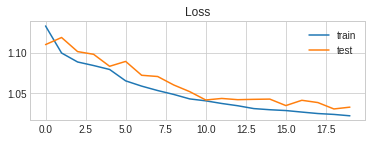

In [83]:
# evaluate the model
from matplotlib import pyplot
_, train_mse = NN_model.evaluate(x_train_scaled, y_train, verbose=0)
_, test_mse = NN_model.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

In [33]:
#RMSE

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

NN_model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])

In [34]:
history = NN_model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=20, 
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
1482/1482 [==============================] - 40s 26ms/step - loss: 1.0257 - accuracy: 0.5910 - val_loss: 1.0431 - val_accuracy: 0.5866
Epoch 2/20
1482/1482 [==============================] - 31s 21ms/step - loss: 1.0258 - accuracy: 0.5913 - val_loss: 1.0360 - val_accuracy: 0.5942
Epoch 3/20
1482/1482 [==============================] - 33s 22ms/step - loss: 1.0243 - accuracy: 0.5918 - val_loss: 1.0496 - val_accuracy: 0.5865
Epoch 4/20
1482/1482 [==============================] - 31s 21ms/step - loss: 1.0231 - accuracy: 0.5928 - val_loss: 1.0379 - val_accuracy: 0.5963
Epoch 5/20
1482/1482 [==============================] - 31s 21ms/step - loss: 1.0241 - accuracy: 0.5922 - val_loss: 1.0379 - val_accuracy: 0.5921
Epoch 6/20
1482/1482 [==============================] - 31s 21ms/step - loss: 1.0223 - accuracy: 0.5918 - val_loss: 1.0375 - val_accuracy: 0.5870
Epoch 7/20
1482/1482 [==============================] - 31s 21ms/step - loss: 1.0228 - accuracy: 0.5927 - val_loss: 1.0361 -

In [60]:
# evaluate the model
from matplotlib import pyplot
_, train_rmse = NN_model.evaluate(x_train_scaled, y_train, verbose=0)
_, test_rmse = NN_model.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_rmse, test_rmse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss /Root mean squared error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

KeyboardInterrupt: ignored

In [64]:


NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [65]:



NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


history = NN_model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=256,
    validation_split=0.2
)

Epoch 1/30
741/741 [==============================] - 18s 24ms/step - loss: 8.9639 - mean_squared_error: 8.9639 - val_loss: 8.5169 - val_mean_squared_error: 8.5169
Epoch 2/30
741/741 [==============================] - 18s 24ms/step - loss: 8.9414 - mean_squared_error: 8.9414 - val_loss: 8.5649 - val_mean_squared_error: 8.5649
Epoch 3/30
741/741 [==============================] - 18s 24ms/step - loss: 8.9476 - mean_squared_error: 8.9476 - val_loss: 8.5769 - val_mean_squared_error: 8.5769
Epoch 4/30
741/741 [==============================] - 18s 24ms/step - loss: 8.9312 - mean_squared_error: 8.9312 - val_loss: 8.5295 - val_mean_squared_error: 8.5295
Epoch 5/30
741/741 [==============================] - 18s 24ms/step - loss: 8.9390 - mean_squared_error: 8.9390 - val_loss: 8.4568 - val_mean_squared_error: 8.4568
Epoch 6/30
741/741 [==============================] - 18s 24ms/step - loss: 8.9116 - mean_squared_error: 8.9116 - val_loss: 8.4962 - val_mean_squared_error: 8.4962
Epoch 7/30
741/7

Train: 8.732, Test: 9.174


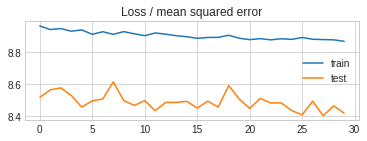

In [66]:
# evaluate the model
from matplotlib import pyplot
_, train_rmse = NN_model.evaluate(x_train_scaled, y_train, verbose=0)
_, test_rmse = NN_model.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_rmse, test_rmse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss / mean squared error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

In [56]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

NN_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])

In [57]:
history = NN_model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=20, 
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
1482/1482 [==============================] - 24s 16ms/step - loss: 9.1368 - coeff_determination: 0.2520 - val_loss: 8.7718 - val_coeff_determination: 0.3024
Epoch 2/20
1482/1482 [==============================] - 23s 15ms/step - loss: 9.0920 - coeff_determination: 0.2570 - val_loss: 8.6236 - val_coeff_determination: 0.2631
Epoch 3/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.0639 - coeff_determination: 0.2413 - val_loss: 8.6686 - val_coeff_determination: 0.2923
Epoch 4/20
1482/1482 [==============================] - 23s 16ms/step - loss: 9.0526 - coeff_determination: 0.2605 - val_loss: 8.5924 - val_coeff_determination: 0.2935
Epoch 5/20
1482/1482 [==============================] - 23s 15ms/step - loss: 9.0515 - coeff_determination: 0.2542 - val_loss: 8.6313 - val_coeff_determination: 0.3065
Epoch 6/20
1482/1482 [==============================] - 23s 15ms/step - loss: 9.0311 - coeff_determination: 0.2587 - val_loss: 8.6066 - val_coeff_determination:

In [ ]:
Prediction_dataset = pd.read_csv("/content/gdrive/MyDrive/Master_Thesis/Prediction_data.csv",sep=',', header=0)
Prediction_dataset.columns=['new_id','Id','Date','Product_identifier','Department_identifier','Product_category','Outlet','State','Week_id','Sell_price']
Prediction_dataset=Prediction_dataset.drop(['Id','new_id'], axis=1)
Prediction_dataset

,Date,Product_identifier,Department_identifier,Product_category,Outlet,State,Week_id,Sell_price
0,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...
15495,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [ ]:
##checking datatypes for test data
Prediction_dataset.dtypes

Date                      object
Product_identifier         int64
Department_identifier      int64
Product_category          object
Outlet                     int64
State                     object
Week_id                    int64
Sell_price               float64
dtype: object

In [ ]:
col = ['Product_category', 'State']
Prediction_dataset[col] = Prediction_dataset[col].astype('category')
Prediction_dataset.dtypes

Date                       object
Product_identifier          int64
Department_identifier       int64
Product_category         category
Outlet                      int64
State                    category
Week_id                     int64
Sell_price                float64
dtype: object

In [ ]:
##label encoder to convert categorical data, or text data, into numbers, which our predictive models can better understand.
Prediction_dataset['state_encoded'] = LabelEncoder().fit_transform(Prediction_dataset['State'])
Prediction_dataset[['State', 'state_encoded']]

,State,state_encoded
0,Maharashtra,1
1,Maharashtra,1
2,Maharashtra,1
3,Maharashtra,1
4,Maharashtra,1
...,...,...
15495,Kerala,0
15496,Kerala,0
15497,Kerala,0
15498,Kerala,0


In [ ]:
Prediction_dataset['Product_category_encode'] = LabelEncoder().fit_transform(Prediction_dataset['Product_category'])
Prediction_dataset[['Product_category', 'Product_category_encode']]

,Product_category,Product_category_encode
0,others,2
1,others,2
2,others,2
3,others,2
4,fast_moving_consumer_goods,1
...,...,...
15495,drinks_and_food,0
15496,drinks_and_food,0
15497,drinks_and_food,0
15498,drinks_and_food,0


In [ ]:
Prediction_dataset['Month'] = pd.to_datetime(Prediction_dataset['Date']).dt.month
Prediction_dataset = Prediction_dataset.drop(columns=["Date","Week_id","State","Product_category"])
Prediction_dataset

,Product_identifier,Department_identifier,Outlet,Sell_price,state_encoded,Product_category_encode,Month
0,74,11,111,3.43,1,2,3
1,337,11,111,7.78,1,2,3
2,423,12,111,0.97,1,2,3
3,432,12,111,4.97,1,2,3
4,581,21,111,4.88,1,1,3
...,...,...,...,...,...,...,...
15495,2932,33,333,2.78,0,0,3
15496,2935,33,333,0.20,0,0,3
15497,3004,33,333,2.68,0,0,3
15498,3008,33,333,1.98,0,0,3


In [ ]:
   
stacked_prediction = stacked.predict(Prediction_dataset)

Prediction_dataset['Sales'] = stacked_prediction

Prediction_dataset['Id'] = Prediction_dataset['Outlet'].astype(str) + '_' +  Prediction_dataset['Department_identifier'].astype(str) + '_' +  Prediction_dataset['Product_identifier'].astype(str)
Prediction_dataset = Prediction_dataset[['Id', 'Sales']]
Prediction_dataset = Prediction_dataset.rename(columns={'Id': 'Id', 'Sales': 'sales'})

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestR

In [ ]:
##index=false--avoid pandas creating an index in saved csv file
from google.colab import drive
drive.mount('drive')
Prediction_dataset.to_csv('final_output.csv', index=False)
!cp final_output.csv "drive/My Drive/"

Mounted at drive
